<a href="https://colab.research.google.com/github/kayahardie/PartIIIProject/blob/main/Submit_2_CHAIN_VOLUME_FRACT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import statistics
import ast
from scipy.stats import spearmanr

In [ ]:
sequences_1 = {'1': 'SSGSGRSGFGSFNGSNGGFGFGSNGGGSXYYXGGGSGNRSNGNGNYQRXGRGXGSXGFXGXGGSSGGGGGSSRGGSRSXFGGGSNGYGNFFNKSFXGGSQQGYGGGGSGGGKGGFNNFFRGQNRRGYSYNRG', '2': 'SGYNGGKSFSFFGNGGGRYGQGSFSXFGGGNGFSFGGGRGNGGGXKGNGYGXSQNSGRQGGSGSGGSGXGGFXGFYYGRNSSSXNGRRGSQGGRGGGSSGFYGGGRSSGNNSSGNFYNSNGXXRGNRGGXFG', '3': 'GNFSGRNSKGGXFNSGXFGXKXGSSRGRGGRYSGRGGXRYYYGGGGQGXGGFGGSFQXNRNFGGSGGSFRGQGNFSGSGSGSGSNQGSNXNFSXYGFGNNSRSSGGRGGNFFGGGGGYNYSSGGGGNGGGGS', '4': 'GFSSXSNYGGYNGKYSFKGGSXSGGGYXGGXGGGGQNGGGNGQFGGGSRGFXRGSRSFGSGSGGNSGNNGQSGRSNSGXGRFNSNSYGSXQRFYNGGXSGSXGGSGRGFGNGGGGGRFGGFNGGSRYFFGNR', '5': 'NFXSQGXGRNFGGSXSSGSNGGYSGGGXGGGSGYFGNGSRGNYNFGSGXRGNSFGRFRNSGGQGFGRKGSSGGGGYYQRNGGGSSGSRRSNSNRGGGFNSSGGGSNXGKFGYXXXYGFSGGNFGGQGFGGGG', '6': 'RGNSFNSGFSQXGRNYRFXGGSSFGNGRYGGNGNFGNGSSNXNSYRXGSSSSGFYGGGGGQGNFGRGRRXNGNRGYSXGGGQXGGGXGGGGSGSGFGFGGGGSSSNGGFYGGXGGRFKNGFSGQYGSGSKGS'}
sequences_2 = {'1': 'QSSSGNGFGGSGNGSYNFKGYFGSFGGGXKGRNXSGSGNXNXGRGGGRGGGGYGRFNFGGGSGQNYXRGRFGSSGGQRFGSSGGNFGGSYRGNFSNXSGSSRNNGGGFNQGGGYGXGGFGGSGRYGSGXXSSSSSSSS', '2': 'KGNFSGNNQSNYGFGXGSYGXSGRNGSGXRSSFGSYGGGYRFGRXKGRSGSSNFGGGGSSSNYGGGYFGRQRGGGGFGGSNXGSRGSGGGGGGGGRNXGGGFGSXXGQNQGGNFFGFGSSGNNXSYSRNFGG', '3': 'XSGRGGNFGGSGRFGFGGGYGGGGGSSYNNNXRGGRQRNXNXSGYGGGGQQSNQGRXXGRGGGGGXGGGGNFXKGRFGSGKGGSYGSSSNGSSGYFXRGNSYGGGGNYGFSSSSNFNGFGNFSRFGFGSSGS', '4': 'QSGSGGNYSGGYNFGGYGXXKGYFNXGGGXNFRFNXNXFGGRGFSNFGGGGFGGGRNFGRGRGQGRSYSGFGNQGSXRSSSGQRSYGGGGGGYGXSGSGSSSNFGGGGSSNNFGXKGNSGGGSSSRRGNGGG', '5': 'FGGGGYSYGFSSGRXRGGSGSSNGFGGSSRNFGGRGGRGFGGQRSGNFRFSGGGGXSYYFNNGGFGGGGQNXGGGGGGGNFGYGNXNXSGGGNYNFGSXXYGQSGGGSSNXKKGNFXSNQGSGRGRGRSSSS', '6': 'GRSSNFXRGSNFGSRFNNGGGGNYGRGGGGSGGFQRGGGSYGNXGRSSGYSSGGSSNFRGSGGQGXGGFGSNYGGNYFNGFGGGNQGGGRGSQSKGSYGRGGSRSGNXGFXKXSFGFGGGNXSGNFGGSYXX'}
sequences_11 = {'1': 'KGGNFGGRSSGXSSSQRGRSGSYNNQSSNFGXXGGGGSYNXFGNGNFGGGRGGGFXRNQGGYGGSSFSGRGGFGGSRGSGGGGQYFXKSSSSYGSGRRFGGNXNFGRGGNGGGGYGGSGXGYNGFGNXGSNF', '2': 'SSSSYGSGRRFGNFGGGRGGGFXSSSQRGRSGSXRNQGGYGGSSGGNXNFGRGGNGGGGSYNXFGNGSGGGGQYFXKYNGFGNXGSNFGGGGYGGSGXGFSGRGGFGGSRKGGNFGGRSSGYNNQSSNFGXX', '3': 'YNGFGNXGSNFXRNQGGYGGSSGSGGGGQYFXKGGGGSYNXFGNFSGRGGFGGSRSSSSYGSGRRFGNFGGGRGGGFGGGGYGGSGXGYNNQSSNFGXXGGNXNFGRGGNXSSSQRGRSGSKGGNFGGRSSG', '4': 'GNFGGGRGGGFYNGFGNXGSNFFSGRGGFGGSRGGGGSYNXFGNXSSSQRGRSGSGGNXNFGRGGNKGGNFGGRSSGXRNQGGYGGSSGSGGGGQYFXKSSSSYGSGRRFYNNQSSNFGXXGGGGYGGSGXG', '5': 'GSGGGGQYFXKFSGRGGFGGSRXSSSQRGRSGSKGGNFGGRSSGYNGFGNXGSNFSSSSYGSGRRFYNNQSSNFGXXXRNQGGYGGSSGGNXNFGRGGNGGGGYGGSGXGGGGGSYNXFGNGNFGGGRGGGF', '6': 'YNNQSSNFGXXGGGGSYNXFGNFSGRGGFGGSRSSSSYGSGRRFGNFGGGRGGGFKGGNFGGRSSGGSGGGGQYFXKGGGGYGGSGXGYNGFGNXGSNFXSSSQRGRSGSXRNQGGYGGSSGGNXNFGRGGN'}
sequences_33 = {'1': 'GSGGGGQYFXKXRNQGGYGGSSSSSSYGSGRRFFSGRGGFGGSRGGGGYGGSGXGYNGFGNXGSNFXSSSQRGRSGSGNFGGGRGGGFGGNXNFGRGGNGGGGSYNXFGNYNNQSSNFGXXKGGNFGGRSSG', '2': 'FSGRGGFGGSRGGGGYGGSGXGYNGFGNXGSNFXSSSQRGRSGSGNFGGGRGGGFGGNXNFGRGGNGSGGGGQYFXKXRNQGGYGGSSSSSSYGSGRRFGGGGSYNXFGNYNNQSSNFGXXKGGNFGGRSSG', '3': 'GGGGSYNXFGNYNNQSSNFGXXKGGNFGGRSSGGSGGGGQYFXKXRNQGGYGGSSSSSSYGSGRRFXSSSQRGRSGSGNFGGGRGGGFGGNXNFGRGGNFSGRGGFGGSRGGGGYGGSGXGYNGFGNXGSNF', '4': 'XSSSQRGRSGSGNFGGGRGGGFGGNXNFGRGGNGGGGSYNXFGNYNNQSSNFGXXKGGNFGGRSSGFSGRGGFGGSRGGGGYGGSGXGYNGFGNXGSNFGSGGGGQYFXKXRNQGGYGGSSSSSSYGSGRRF', '5': 'XSSSQRGRSGSGNFGGGRGGGFGGNXNFGRGGNGSGGGGQYFXKXRNQGGYGGSSSSSSYGSGRRFFSGRGGFGGSRGGGGYGGSGXGYNGFGNXGSNFGGGGSYNXFGNYNNQSSNFGXXKGGNFGGRSSG', '6': 'GGGGSYNXFGNYNNQSSNFGXXKGGNFGGRSSGFSGRGGFGGSRGGGGYGGSGXGYNGFGNXGSNFGSGGGGQYFXKXRNQGGYGGSSSSSSYGSGRRFXSSSQRGRSGSGNFGGGRGGGFGGNXNFGRGGN'}

sequences_66 = {'1': 'GGGGSYNXFGNYNNQSSNFGXXKGGNFGGRSSGGSGGGGQYFXKXRNQGGYGGSSSSSSYGSGRRFXSSSQRGRSGSGNFGGGRGGGFGGNXNFGRGGNFSGRGGFGGSRGGGGYGGSGXGYNGFGNXGSNF'}
sequences_OG = {'1': 'XSSSQRGRSGSGNFGGGRGGGFGGNXNFGRGGNFSGRGGFGGSRGGGGYGGSGXGYNGFGNXGSNFGGGGSYNXFGNYNNQSSNFGXXKGGNFGGRSSGGSGGGGQYFXKXRNQGGYGGSSSSSSYGSGRRF'}

In [ ]:
positions_dict_1 = {}
positions_dict_2 = {}
positions_dict_11 = {}
positions_dict_33 = {}
positions_dict_66 = {}
positions_dict_OG = {}


for key, value in sequences_OG.items():

    positions = [i for i, char in enumerate(value) if char in ('Y', 'F', 'W')]


    positions_dict_OG[key] = positions


print(positions_dict_OG)

for key, value in sequences_66.items():

    positions = [i for i, char in enumerate(value) if char in ('Y', 'F', 'W')]


    positions_dict_66[key] = positions

print(positions_dict_66)

for key, value in sequences_1.items():

    positions = [i for i, char in enumerate(value) if char in ('Y', 'F', 'W')]


    positions_dict_1[key] = positions


print(positions_dict_1)

for key, value in sequences_2.items():

    positions = [i for i, char in enumerate(value) if char in ('Y', 'F', 'W')]


    positions_dict_2[key] = positions


print(positions_dict_2)

for key, value in sequences_11.items():
    positions = [i for i, char in enumerate(value) if char in ('Y', 'F', 'W')]


    positions_dict_11[key] = positions

print(positions_dict_11)

for key, value in sequences_33.items():

    positions = [i for i, char in enumerate(value) if char in ('Y', 'F', 'W')]

    positions_dict_33[key] = positions

print(positions_dict_33)

{'1': [13, 21, 27, 33, 39, 48, 55, 58, 65, 71, 74, 77, 84, 92, 106, 107, 116, 125, 131]}
{'1': [5, 8, 11, 18, 26, 40, 41, 50, 59, 65, 79, 87, 93, 99, 105, 114, 121, 124, 131]}
{'1': [8, 11, 18, 20, 29, 30, 45, 57, 79, 86, 89, 90, 94, 102, 114, 117, 118, 126, 128], '2': [2, 8, 10, 11, 18, 23, 26, 32, 34, 49, 71, 74, 75, 76, 100, 101, 115, 116, 130], '3': [2, 12, 17, 31, 39, 40, 41, 51, 55, 61, 68, 74, 91, 94, 96, 110, 111, 117, 119], '4': [1, 7, 10, 14, 16, 26, 43, 50, 57, 81, 86, 92, 93, 108, 117, 120, 126, 127, 128], '5': [1, 10, 22, 33, 34, 42, 44, 53, 56, 64, 75, 76, 97, 109, 111, 115, 117, 122, 127], '6': [4, 8, 15, 17, 23, 28, 34, 44, 53, 54, 63, 75, 95, 97, 108, 109, 116, 120, 124]}
{'1': [7, 15, 17, 20, 21, 24, 52, 55, 57, 65, 70, 78, 85, 89, 93, 107, 113, 118, 124], '2': [3, 11, 13, 18, 32, 35, 39, 41, 53, 62, 66, 67, 76, 101, 113, 114, 116, 125, 129], '3': [7, 13, 15, 19, 27, 44, 71, 76, 84, 94, 95, 101, 107, 109, 115, 118, 121, 124, 126], '4': [7, 11, 13, 16, 22, 23, 31, 33, 

In [ ]:
seqs = {'OG': {'1': [13, 21, 27, 33, 39, 48, 55, 58, 65, 71, 74, 77, 84, 92, 106, 107, 116, 125, 131]}, '66': {'1': [5, 8, 11, 18, 26, 40, 41, 50, 59, 65, 79, 87, 93, 99, 105, 114, 121, 124, 131]}, '1': {'1': [8, 11, 18, 20, 29, 30, 45, 57, 79, 86, 89, 90, 94, 102, 114, 117, 118, 126, 128], '2': [2, 8, 10, 11, 18, 23, 26, 32, 34, 49, 71, 74, 75, 76, 100, 101, 115, 116, 130], '3': [2, 12, 17, 31, 39, 40, 41, 51, 55, 61, 68, 74, 91, 94, 96, 110, 111, 117, 119], '4': [1, 7, 10, 14, 16, 26, 43, 50, 57, 81, 86, 92, 93, 108, 117, 120, 126, 127, 128], '5': [1, 10, 22, 33, 34, 42, 44, 53, 56, 64, 75, 76, 97, 109, 111, 115, 117, 122, 127], '6': [4, 8, 15, 17, 23, 28, 34, 44, 53, 54, 63, 75, 95, 97, 108, 109, 116, 120, 124]}, '2': {'1': [7, 15, 17, 20, 21, 24, 52, 55, 57, 65, 70, 78, 85, 89, 93, 107, 113, 118, 124], '2': [3, 11, 13, 18, 32, 35, 39, 41, 53, 62, 66, 67, 76, 101, 113, 114, 116, 125, 129], '3': [7, 13, 15, 19, 27, 44, 71, 76, 84, 94, 95, 101, 107, 109, 115, 118, 121, 124, 126], '4': [7, 11, 13, 16, 22, 23, 31, 33, 38, 43, 46, 51, 57, 67, 70, 85, 92, 103, 112], '5': [0, 5, 7, 9, 24, 31, 39, 47, 49, 57, 58, 59, 64, 80, 82, 93, 95, 100, 115], '6': [5, 11, 15, 23, 33, 40, 49, 57, 68, 72, 76, 77, 80, 97, 109, 114, 116, 125, 129]}, '11': {'1': [4, 22, 29, 38, 41, 46, 54, 61, 66, 72, 84, 85, 92, 98, 104, 114, 121, 124, 131], '2': [4, 10, 13, 21, 39, 49, 60, 63, 73, 74, 77, 80, 87, 92, 99, 105, 114, 121, 128], '3': [0, 3, 10, 17, 29, 30, 38, 41, 44, 50, 59, 65, 68, 76, 81, 88, 95, 104, 125], '4': [2, 10, 11, 14, 21, 22, 28, 38, 41, 60, 70, 83, 95, 96, 103, 109, 110, 117, 125], '5': [7, 8, 11, 17, 37, 44, 47, 54, 59, 65, 66, 73, 83, 93, 103, 115, 118, 123, 131], '6': [0, 7, 16, 19, 22, 28, 37, 43, 46, 54, 59, 73, 74, 81, 88, 91, 98, 116, 126]}, '33': {'1': [7, 8, 17, 26, 32, 33, 39, 48, 55, 58, 65, 79, 87, 93, 104, 107, 110, 117, 125], '2': [0, 6, 15, 22, 25, 32, 46, 54, 60, 73, 74, 83, 92, 98, 104, 107, 110, 117, 125], '3': [5, 8, 11, 18, 26, 40, 41, 50, 59, 65, 79, 87, 93, 99, 105, 114, 121, 124, 131], '4': [13, 21, 27, 38, 41, 44, 51, 59, 66, 72, 81, 88, 91, 98, 106, 107, 116, 125, 131], '5': [13, 21, 27, 40, 41, 50, 59, 65, 66, 72, 81, 88, 91, 98, 104, 107, 110, 117, 125], '6': [5, 8, 11, 18, 26, 33, 39, 48, 55, 58, 65, 73, 74, 83, 92, 98, 112, 120, 126]} }

In [ ]:
sequence_l = 25
chain_l = 132
new_chunks = ['OG', '66', '33', '11', '2', '1']

In [ ]:
##Patterning parameter
def Spacer_S(s):
    seq_calc = np.append(np.append(0, np.array(s)), chain_l-1)
    para = 0
    for i in range(1, len(seq_calc)):
        f = (seq_calc[i]-seq_calc[i-1])/(chain_l-1)
        if f != 0:
            para -= f*np.log(f)
    return para #para is the entropy of the spacers in the sequence

#Calculating max omega
max_sequence= [i for i in range(sequence_l)]
f_stick = sequence_l/chain_l
f_space = (1-f_stick)
sigma_tot = (f_stick - f_space)**2 #assumes sticky residues are aromatic

blob_l = 5 #5 this is set - see literature
N_blob = chain_l-blob_l+1    #see literature

def omega_max(s):
    seq = np.zeros(chain_l, dtype = int)
    omega = 0
    for i in s:
        seq[i] = 1
    for i in range(0, N_blob):
        seq_segment = np.array(seq[i:i+blob_l])
        sigma_segment = (2*(np.sum(seq_segment)/blob_l)-1)**2
        omega += (sigma_segment-sigma_tot)**2
    omega /= N_blob
    omega_max = omega
    return omega_max

omega_max = (omega_max(max_sequence))
print(omega_max)

#Calculating omega
def omega(s):
    seq = np.zeros(chain_l, dtype = int)
    omega = 0
    for i in s:
        seq[i] = 1
    for i in range(0, N_blob):
        seq_segment = np.array(seq[i:i+blob_l])
        #print(seq_segment)
        sigma_segment = (2*(np.sum(seq_segment)/blob_l)-1)**2
        omega += (sigma_segment-sigma_tot)**2
    omega /= N_blob
    omega /= omega_max
    return omega

patterning_parameter_dict = {}

for i in new_chunks:
    patterning_parameter_dict[i] = {}
    x = seqs[i]
    for key, value in x.items():
      omega_seq = (omega(value))
      patterning_parameter_dict[i][key] = omega_seq
print(patterning_parameter_dict)


0.3672085086612014
{'OG': {'1': 0.4035613276761683}, '66': {'1': 0.4035613276761679}, '33': {'1': 0.41368661045998234, '2': 0.40356132767616815, '3': 0.4035613276761679, '4': 0.4035613276761681, '5': 0.4136866104599823, '6': 0.37152552311037823}, '11': {'1': 0.3824807840013662, '2': 0.39808369723067405, '3': 0.4221105506550163, '4': 0.49041482307132983, '5': 0.44319109432981857, '6': 0.42464187135097026}, '2': {'1': 0.45078505641767913, '2': 0.5169729971916256, '3': 0.47692824148438867, '4': 0.4453074259721848, '5': 0.5304595787785673, '6': 0.4166329202095229}, '1': {'1': 0.532575910420934, '2': 0.6071877913899144, '3': 0.4958924535168234, '4': 0.5013700839623181, '5': 0.5009550949087309, '6': 0.4453074259721853}}


In [ ]:
file_name = 'GRAPH_45_25/transition_temp_data.txt'

In [ ]:
loc = '2_chains/final_graphs'
path = f'/content/drive/MyDrive/A_132/{loc}'
%cd $path

/content/drive/MyDrive/A_132/2_chains/final_graphs


In [ ]:
tt_OG = {}
tt_OG_error = {}
tt_OG['OG'] = {}
tt_OG_error['OG'] = {}

path = f'/content/drive/MyDrive/A_132/2_chains/{file_name}'
with open(path, 'r') as file:
  for line in file:
      if 'Transition Temperature' in line:
          den_vol = float(line.split(':')[-1].strip())
          tt_OG['OG']['1'] = den_vol
      if 'Error' in line:
          dil_vol = float(line.split(':')[-1].strip())
          tt_OG_error['OG']['1'] = dil_vol
          break

print(tt_OG)
print(tt_OG_error)

{'OG': {'1': 35.426645306844165}}
{'OG': {'1': 0.40825178531886935}}


In [ ]:
tt_OG['66'] ={}
tt_OG_error['66'] ={}
path = f'/content/drive/MyDrive/CHUNK_66_132/2_chains_NEW_2_FINISHED/{file_name_2}'
with open(path, 'r') as file:
  for line in file:
      if 'Transition Temperature' in line:
          den_vol = float(line.split(':')[-1].strip())
          tt_OG['66']['1'] = den_vol
      if 'Error' in line:
          dil_vol = float(line.split(':')[-1].strip())
          tt_OG_error['66']['1'] = dil_vol
          break

print(tt_OG)
print(tt_OG_error)

{'OG': {'1': 35.426645306844165}, '66': {'1': 34.185752203917744}, '1': {'1': 35.869584149076154, '2': 35.48051039441738, '3': 35.48051039441738, '4': 36.483537446476134, '5': 33.30922245239202, '6': 34.66917398608105}, '2': {'1': 34.90303498957352, '2': 36.11027014662969, '3': 34.23434683355792, '4': 36.60914943662521, '5': 36.05868363446696, '6': 34.438666672774545}, '11': {'1': 34.57350847412266, '2': 34.603738577130656, '3': 35.19318608285457, '4': 35.13220814271674, '5': 35.63987316496488, '6': 35.232969962949625}, '33': {'1': 35.76871348958284, '2': 34.186297553869515, '3': 34.0729806571489, '4': 34.93569606198846, '5': 35.674969476132105, '6': 34.37698760911426}}
{'OG': {'1': 0.40825178531886935}, '66': {'1': 0.22808155898232396}, '1': {'1': 0.32841673956833345, '2': 0.17843204133701396, '3': 0.17843204133701396, '4': 0.0962496974481024, '5': 0.38429306368887095, '6': 0.3419978138795961}, '2': {'1': 0.2681138368477403, '2': 0.12062148019648666, '3': 0.13995914932689593, '4': 0.1

In [ ]:
file_name_2 = 'GRAPH_45_25/transition_temp_data_np_clip.txt'

In [ ]:
reshuff= ['1', '2', '3', '4', '5', '6']
chunk = ['1', '2', '11', '33']

for i in chunk:
  x_path = f'/content/drive/MyDrive/CHUNK_{i}_132'
  tt_OG[i] ={}
  tt_OG_error[i] ={}
  for j in reshuff:
    y_path =  f'reshuffle_{j}/2_chains_NEW_2/{file_name_2}'
    path = os.path.join(x_path, y_path)
    if os.path.exists(path):
      with open(path, 'r') as file:
        for line in file:
            if 'Transition Temperature' in line:
                den_vol = float(line.split(':')[-1].strip())
                tt_OG[i][j] = den_vol
            if 'Error' in line:
                dil_vol = float(line.split(':')[-1].strip())
                tt_OG_error[i][j] = dil_vol
                break


In [ ]:
print(tt_OG)
print(tt_OG_error)

{'OG': {'1': 35.426645306844165}, '66': {'1': 34.185752203917744}, '1': {'1': 35.85826619045436, '2': 35.4169906438142, '3': 35.4169906438142, '4': 36.34337923767557, '5': 33.13543631661684, '6': 34.46962662496612}, '2': {'1': 34.67664460721024, '2': 36.00858792263007, '3': 34.0779510902706, '4': 36.55779668685192, '5': 35.87707613178189, '6': 34.29508335290566}, '11': {'1': 34.35648001840289, '2': 34.38634167700746, '3': 34.99727618844375, '4': 34.9638537745277, '5': 35.44436190245031, '6': 35.11301333228669}, '33': {'1': 35.566230006921124, '2': 33.967035786758956, '3': 33.600741405648066, '4': 34.59141824246542, '5': 35.460638675018664, '6': 34.28755049675658}}
{'OG': {'1': 0.40825178531886935}, '66': {'1': 0.22808155898232396}, '1': {'1': 0.3529971081756542, '2': 0.1967821477585603, '3': 0.1967821477585603, '4': 0.09840869985081459, '5': 0.3821270019288657, '6': 0.3616641089235687}, '2': {'1': 0.26763222612584125, '2': 0.13115129004909465, '3': 0.11117712046204317, '4': 0.141193441

[Errno 2] No such file or directory: '/content/drive/MyDrive/A_132/final_graphs_2_chains'
/content/drive/MyDrive/A_132/2_chains/final_graphs
[35.426645306844165]
[34.185752203917744]
[35.566230006921124, 33.967035786758956, 33.600741405648066, 34.59141824246542, 35.460638675018664, 34.28755049675658]
[34.35648001840289, 34.38634167700746, 34.99727618844375, 34.9638537745277, 35.44436190245031, 35.11301333228669]
[34.67664460721024, 36.00858792263007, 34.0779510902706, 36.55779668685192, 35.87707613178189, 34.29508335290566]
[35.85826619045436, 35.4169906438142, 35.4169906438142, 36.34337923767557, 33.13543631661684, 34.46962662496612]


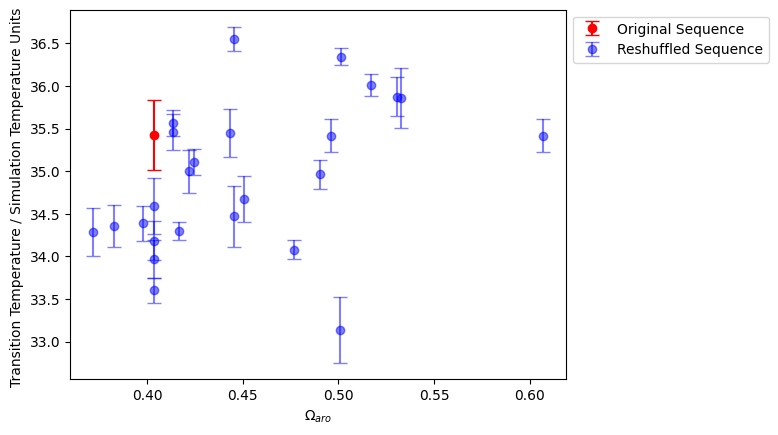

In [ ]:
loc = 'final_graphs_2_chains'
path = f'/content/drive/MyDrive/A_132/{loc}'
%cd $path

label_2 = f'$^3$'
label_1 = f'$^-$'
label_3 = f'{label_1}{label_2}'

colors = {}

new_chunks = ['OG', '66', '33', '11', '2', '1']
reshuffled_label_added = False

for i in new_chunks:
  param_i = patterning_parameter_dict[i]
  tt = tt_OG[i]
  tt_error = tt_OG_error[i]
  list_values = []
  list_keys = []
  list_errors = []
  for key, value in tt.items():
    param = param_i[key]
    list_values.append(value)
    list_keys.append(param)
    error = tt_error [key]
    list_errors.append(error)

  if i == 'OG':
        color = 'red'
        label = 'Original Sequence'
        marker_alpha = 1.0
  else:
      color = 'blue'
      marker_alpha = 0.5
      if i == '66' and not reshuffled_label_added:
          label = 'Reshuffled Sequence'
          reshuffled_label_added = True
      else:
          label = None


  print(list_values)
  #color = plt.cm.get_cmap('tab10')(shuff.index(j) / len(shuff))
  #colors[j] = color
  #marker_color = color
  #j_number = int(j.split('_')[1])
  plt.errorbar(list_keys, list_values, yerr= list_errors, marker='o', color = color, capsize=5, alpha=marker_alpha, linestyle='None', label = label)

#plt.xscale('log')
plt.xlabel(r'$\Omega_{aro}$')
#plt.xlim(0.8, 100)
plt.ylabel('Transition Temperature / Simulation Temperature Units ')

#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#plt.title(f'Dilute Phase Concentrations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('transition_temps_patterning_param_NEW.png')
plt.show()

In [ ]:
patterning_parameter_dict = {'OG': {'1': 0.4035613276761683}, '66': {'1': 0.4035613276761679}, '33': {'1': 0.41368661045998234, '2': 0.40356132767616815, '3': 0.4035613276761679, '4': 0.4035613276761681, '5': 0.4136866104599823, '6': 0.37152552311037823}, '11': {'1': 0.3824807840013662, '2': 0.39808369723067405, '3': 0.4221105506550163, '4': 0.49041482307132983, '5': 0.44319109432981857, '6': 0.42464187135097026}, '2': {'1': 0.45078505641767913, '2': 0.5169729971916256, '3': 0.47692824148438867, '4': 0.4453074259721848, '5': 0.5304595787785673, '6': 0.4166329202095229}, '1': {'1': 0.532575910420934, '2': 0.6071877913899144, '3': 0.4958924535168234, '4': 0.5013700839623181, '5': 0.5009550949087309, '6': 0.4453074259721853}}

In [ ]:
list_conc = []
list_param = []
for k in new_chunks:
    tt = tt_OG[i]
    param_i = patterning_parameter_dict[i]
    for key, value in tt.items():
      param =  param_i[key]
      dil_vol_frac_k = value
      list_conc.append(dil_vol_frac_k)
      list_param.append(param)

X = np.array(list_param)
Y = np.array(list_conc)
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Step 2: Compute covariance
covariance = np.cov(X, Y)[0, 1]

# Step 3: Compute standard deviations
std_dev_X = np.std(X, ddof=1)  # ddof=1 for sample standard deviation
std_dev_Y = np.std(Y, ddof=1)

# Step 4: Calculate Pearson's correlation coefficient
correlation_coefficient = covariance / (std_dev_X * std_dev_Y)

print("Pearson's correlation coefficient:", correlation_coefficient)
spearman_coefficient, _ = spearmanr(X, Y)

print("Spearman's rank correlation coefficient:", spearman_coefficient)

Pearson's correlation coefficient: 0.2959850593445008
Spearman's rank correlation coefficient: 0.4928053803045811


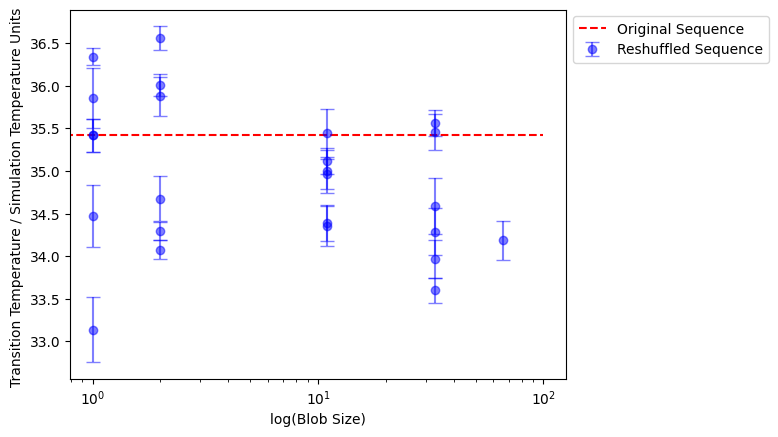

In [ ]:
label_2 = f'$^3$'
label_1 = f'$^-$'
label_3 = f'{label_1}{label_2}'

colors = {}

new_chunks = ['1', '2', '11', '33', '66']

plt.hlines(tt_OG['OG']['1'], xmin=0, xmax=100, color='red', linestyle='dashed', label='Original Sequence')
for i in new_chunks:
  tt = tt_OG[i]
  tt_error = tt_OG_error[i]
  list_values = []
  list_keys = []
  list_errors = []
  for key, value in tt.items():
    list_values.append(value)
    list_keys.append(int(i))
    error = tt_error [key]
    list_errors.append(error)

  color = 'blue'
  marker_alpha = 0.5
  label = 'Reshuffled Sequence' if i == '66' and key == '1' else None
  plt.errorbar(list_keys, list_values, yerr= list_errors, color = color, marker='o', capsize=5, alpha=marker_alpha, label = label, linestyle = 'None')

plt.xscale('log')
plt.xlabel('log(Blob Size)')
plt.ylabel('Transition Temperature / Simulation Temperature Units ')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('transition_temps_blob_NEW.png')
plt.show()